# Goal of Analysis: confirm the old version with only one translation performs better

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
user_df = pd.read_csv('user_table.csv')
user_df

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain
...,...,...,...,...
452862,756215,F,27,Venezuela
452863,36888,M,18,Argentina
452864,800559,M,28,Bolivia
452865,176584,M,19,Chile


In [3]:
test_df = pd.read_csv('test_table.csv')
test_df

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1
...,...,...,...,...,...,...,...,...,...
453316,425010,2015-12-04,SEO,Web,ES,NaN,FireFox,0,0
453317,826793,2015-12-01,SEO,Mobile,ES,NaN,Android_App,0,1
453318,514870,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0
453319,785224,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,1


#### I will first merge these two tables, but they have different sizes, which means some of the rows will have null values 

In [17]:
df_merged = pd.merge(user_df, test_df, how = 'right', on='user_id')

In [18]:
df_merged

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,M,32.0,Spain,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,M,21.0,Mexico,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,M,34.0,Spain,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,F,22.0,Mexico,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,M,19.0,Mexico,2015-11-30,Ads,Web,ES,Google,FireFox,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
453316,425010,M,50.0,Mexico,2015-12-04,SEO,Web,ES,NaN,FireFox,0,0
453317,826793,F,20.0,Colombia,2015-12-01,SEO,Mobile,ES,NaN,Android_App,0,1
453318,514870,M,25.0,Spain,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0
453319,785224,M,21.0,Colombia,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,1


### EDA to explore my dataset

In [16]:
print('Variable', '   ', 'Count of unique value','  ', 'content')
for column in df_merged.columns:
    uniques = df_merged[column].unique()
    print('{0:20s} {1:4d}\t'.format(column, len(uniques)), uniques[:10])

Variable     Count of unique value    content
user_id              453321	 [315281 497851 848402 290051 548435 540675 863394 527287 261625  10427]
sex                     3	 ['M' 'F' nan]
age                    53	 [32. 21. 34. 22. 19. 35. 31. 33. 37. 29.]
country                18	 ['Spain' 'Mexico' 'Venezuela' 'Bolivia' 'Colombia' 'Uruguay' 'El Salvador'
 'Nicaragua' 'Peru' 'Costa Rica']
date                    5	 ['2015-12-03' '2015-12-04' '2015-11-30' '2015-12-01' '2015-12-02']
source                  3	 ['Direct' 'Ads' 'SEO']
device                  2	 ['Web' 'Mobile']
browser_language        3	 ['ES' 'Other' 'EN']
ads_channel             6	 [nan 'Google' 'Facebook' 'Bing' 'Yahoo' 'Other']
browser                 7	 ['IE' 'Chrome' 'Android_App' 'FireFox' 'Iphone_App' 'Safari' 'Opera']
conversion              2	 [1 0]
test                    2	 [0 1]


<AxesSubplot:xlabel='country'>

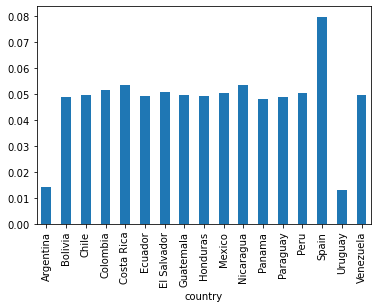

In [14]:
df_merged.groupby('country')['conversion'].mean().plot(kind = 'bar')

apparently, Spain has the highest conversion rate and Uruguay has the lowest

<function matplotlib.pyplot.show(close=None, block=None)>

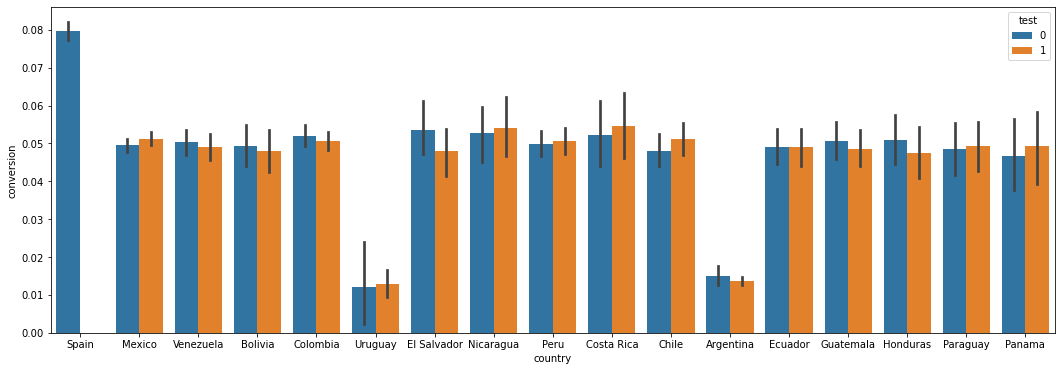

In [15]:
import seaborn as sns
fix, ax = plt.subplots(figsize=(18,6))
sns.barplot(x='country', y='conversion', hue='test', data = df_merged, ax=ax)
plt.show()

because we have to keep Spain in our control group, so I will look at the test/control spreads without Spain

In [8]:
df_no_spain = df_merged.loc[df_merged['country'] != 'Spain',:]
df_no_spain.groupby("test")[["conversion"]].mean()

,conversion
test,
0,0.048330
1,0.043425


we can see that the control group without change of translation has conversion rate of 4.8% while has conversion rate of only 4.3% after change of translation

### use t-test to see if the test is negative

In [10]:
conv_in_test = df_no_spain.loc[test_df.test==1,"conversion"]
conv_in_ctrl = df_no_spain.loc[test_df.test==0,"conversion"]

ss.ttest_ind(conv_in_test,conv_in_ctrl)

Ttest_indResult(statistic=-7.422512095954769, pvalue=1.15144687852198e-13)

based on the t-test, the local translation makes the situation even worse

### Further Analysis to confirm my observation

In [21]:
import warnings
warnings.filterwarnings('ignore')

countries = [name for name in df_merged['country'].unique() if name is not np.nan]

print('{0:15s} {1:>15s} {2:>15s} {3:>10s}'.format('Country', 'Test Rate', 'Control Rate', 'P-Value'))
print('-' * 65)
for country in countries:
    test_val = df_merged[(df_merged['country'] == country) & (df_merged['test'] == 1)]['conversion'].values
    cont_val = df_merged[(df_merged['country'] == country) & (df_merged['test'] == 0)]['conversion'].values
    
    test_mean = test_val.mean()
    cont_mean = cont_val.mean()
    p_val = ss.ttest_ind(test_val, cont_val, equal_var=False).pvalue
    
    print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(country, test_mean, cont_mean, p_val))

Country               Test Rate    Control Rate    P-Value
-----------------------------------------------------------------
Spain                       nan         0.07972        nan
Mexico                  0.05119         0.04949   0.165544
Venezuela               0.04898         0.05034   0.573702
Bolivia                 0.04790         0.04937   0.718885
Colombia                0.05057         0.05209   0.423719
Uruguay                 0.01291         0.01205   0.879764
El Salvador             0.04795         0.05355   0.248127
Nicaragua               0.05418         0.05265   0.780400
Peru                    0.05060         0.04991   0.771953
Costa Rica              0.05474         0.05226   0.687876
Chile                   0.05130         0.04811   0.302848
Argentina               0.01373         0.01507   0.335147
Ecuador                 0.04899         0.04915   0.961512
Guatemala               0.04865         0.05064   0.572107
Honduras                0.04754         0.05091  

After we control the country, we can see that the conversion rate has no significant difference, therefore the change of translation will not result in conversion rate drop